# U.S. Medical Insurance Costs

## Introduction

The ogininal data file  is `insurance.csv`. Variables are:  age, sex, bmi, children, smoker, region, **charges**

Objectives:
- What is correlated to high medical costs?
- What is correlated to low medical costs?
- Are there weird correlations, like smoking and children? Do parents of children smoke more?


Roadmap
1/ clean up the data, and create useful sub dict, indexed, etc...
2/ Basics facts: number of smokers, etc...

Basics:
- Ranges of each variable: min / max and average.
- Percentages of smokers, regions, children?


Correlations: Pairs of variables to look at:
- Charge average by : age (brackets), bmi (brackets?), children, smoker, region
    Basic conclusion : factors that increase or decrease price

- silly ones : children/smoker, bmi/smoker, age/smoker


Triple variable:?

\\ Questions?

?? Brackets for age and charges.
Maybe create a male and female data set.
Do I need to give an id to each row?
I think it might be necessary to avoid using the same row twice  when pulling from several tables.


**Notes before getting started :**
- Don't forget to import libraries csv and ???
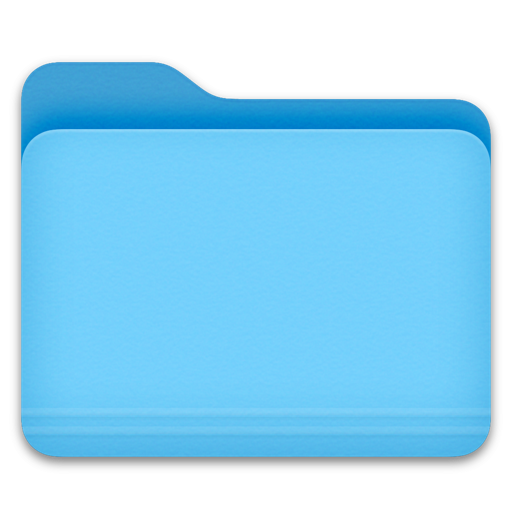
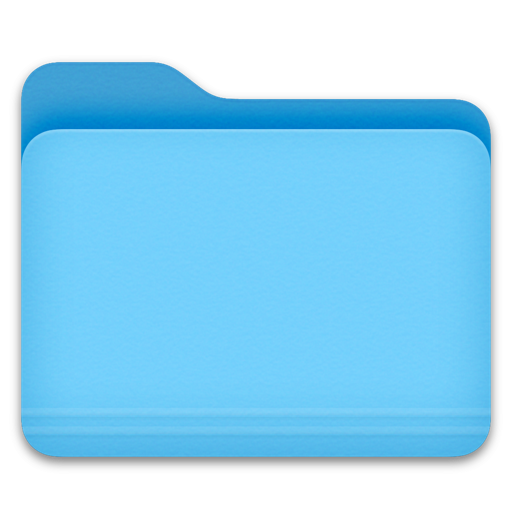

## Roadmap:

### Setup & Prepare data
import csv library
import csv file and turn it into a dictionary of everything

#### Indexed dictionaries:
- A full indexed dictionary
- a male and female, sub-dictionary (indexed)


#### Create new csv files
- An indexed csv
- A male indexed csv and a female indexed csv


### Explore Data:
Let's start counting things:
- number of males, females, smokers, by regions, etc...
-




### Setup & Prepare Data:
I now have 3 dictionaries:
- indexed_insurance_data
- male_insurance_data
- female_insurance-data

And 3 new csv files:
- indexed_insurance.csv
- male_indexed_insurance.csv
- female_indexed_insurance.csv

In [5]:
import csv
from itertools import count

### I want to import my file insurance.csv let's see if i can see it.
insurance_data = csv.DictReader(open("insurance.csv"))
# print(insurance_data)                     ## check/debug line

## I want to have a giant dictionary of all the data
indexed_insurance_data = {}
id = 1
for row in insurance_data:
    indexed_insurance_data[id] = row
    id += 1
#print(indexed_insurance_data)             ## check/debug line


## I want to create a dictionary of all the males.
males_insurance_data = {}
for key, record in indexed_insurance_data.items():
    # print(key, record)                   ## debug line
    if record.get('sex') == 'male':
        males_insurance_data[key] = record
# print(males_insurance_data)

## A Dictionary of females:
females_insurance_data = {}
for key, record in indexed_insurance_data.items():
    # print(key, record) ## debug line
    if record.get('sex') == 'female':
        females_insurance_data[key] = record
# print(females_insurance_data)         ## check/debug line

### Let's write new csv files : the indexed version, male and female version
## scoping this wide, we'll reuse it.
fields = ['id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


 ## Tricky : we first make the rows using all the fields (adding 'id'). Then, we can just write the record, but then we're ## missing the id. The column exists, but the field is empty. So we do this hack: create a row = id: index dictionary. to which we update the rest of the dictionary. We can write the whole row as a dictionary.

 # create a new csv file with a new column for the id.
with open("indexed_insurance.csv", "w") as output_csv:
    output_writer = csv.DictWriter(output_csv, fieldnames=fields)
    output_writer.writeheader()
    for index, record in indexed_insurance_data.items():
        row = {'id': index}
        row.update(record)
        output_writer.writerow(row)

file_path = "male_indexed_insurance.csv"
with open(file_path, 'w')as f:
    output_writer = csv.DictWriter(f, fieldnames=fields)
    output_writer.writeheader()
    for index, record in males_insurance_data.items():
        row={'id': index}
        row.update(record)
        output_writer.writerow(row)


file_path = "female_indexed_insurance.csv"
with open(file_path, 'w')as f:
    output_writer = csv.DictWriter(f, fieldnames=fields)
    output_writer.writeheader()
    for index, record in females_insurance_data.items():
        row={'id': index}
        row.update(record)
        output_writer.writerow(row)



from collections import Counter


### Explore Data
We have cleanish data.

let's explore. i want to know the ranges of things. number of smokers,




In [6]:
# let's count the males and females.
number_of_males = 0
for i in males_insurance_data.keys():
    number_of_males += 1
print(number_of_males)  ## returns 676


number_of_females = 0
for i in females_insurance_data.keys():
    number_of_females += 1
print(number_of_females) ## returns 662

## let's check using the main dictionary
num_fem = 0
num_mal = 0
for record in indexed_insurance_data.values():
        if record.get('sex') == 'female':
            num_fem += 1
        elif record.get('sex') == 'male':
            num_mal += 1
print(f"Females = {num_fem}, Males = {num_mal}")


### Let's count ocurences of some variables

sex_counter = Counter(record['sex'] for record in indexed_insurance_data.values())
print(sex_counter)

region_counter = Counter(record['region'] for record in indexed_insurance_data.values())
print(region_counter)

smoker_counter = Counter(record['smoker'] for record in indexed_insurance_data.values())
print(f"Is this person a smoker? No: {smoker_counter['no']}, Yes: {smoker_counter['yes']}")

children_counter = Counter(record['children'] for record in indexed_insurance_data.values())
print(children_counter)




676
662
Females = 662, Males = 676
Counter({'male': 676, 'female': 662})
Counter({'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324})
Is this person a smoker? No: 1064, Yes: 274
Counter({'0': 574, '1': 324, '2': 240, '3': 157, '4': 25, '5': 18})


### Pre-analyse:
I have the following dictionaries for single variables:
- indexed_charges {id : charges}
- indexed_bmi  {id : bmi}
- indexed_age  {id : age}

In [8]:
## So I want to have a dictionary of id + charges

## this gives a dict of id + charges
indexed_charges = {id: data['charges'] for id, data in indexed_insurance_data.items()}
# print(indexed_charges)

## this gives a dict of id + bmi
indexed_bmi = {id : data['bmi'] for id, data in indexed_insurance_data.items()}
#print(indexed_bmi)

## this gives a dict of id + age
indexed_age = {id : data['age'] for id, data in indexed_insurance_data.items()}
#print(indexed_age)

## This is another way to do it that I like less.
# ind_char = {}
# for index, record in indexed_insurance_data.items():
#     ind_char[index] = record['charges']
# #print(ind_char)

## This prints the first ten values of the dict. I would like something that simple, but with the key attached
# range_ten = range(1,11)
# for i in range_ten:
#     print(i, indexed_charges[i])



### Now, let's use dict reader to generate it for regions.
# with open(indexed_insurance.csv) as f:

# let's test something
print(2+4)





6
